# Simplest CNN for MNIST Digit-Rcognizer

What is MNIST Dataset?
MNIST Database is a collection of Images of Hand written Numbers (0-9). Each image is of size 28x28 pixels i.e 28 pixels in length and 28 pixels in height with only 1 axis to represent color gradient which is Black and White. Original Training set have 60,000 images for training and 10,000 images for test. But here in Kaggle we are given 42,000 images with label which will be used for training and 28,000 images to test/ predict results on.

Entire Notebook has 4 major segments:
1st - DATA EXTRACTION
2ND - DATA PREPROCESSING
3RD - MODELLING
4TH - DATA POST PROCESS

In [1]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


# DATA EXTRACTION
Data extraction from Given CSV files

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_x_orig = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_x_orig = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print(train_x_orig.shape)
print(test_x_orig.shape)

(42000, 785)
(28000, 784)


Raw data:
train.csv and test.csv have Different shapes as Train.csv contains one extra column for actual labels of images 785-784. and 42,000 , 28,000 represent the number of images.

The difference between them can be seen by calling there HEAD for 5 instances.

In [3]:
print('traiing dataset columns',train_x_orig.head())
print('\n test set columns',test_x_orig.head())

print(type(train_x_orig))
print(type(test_x_orig))

traiing dataset columns    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0     

Extracting Lables and pixels from our train_x_orig dataset.
As we will preprocess the pixels values before fitting the model.

DATA extracted is in DATAFRAME FORMAT as seen by 'type(test_x_orig)' command. 

In [4]:
labels_train = (train_x_orig['label'].values).reshape(-1,1)

pixels_train = train_x_orig.drop('label', axis = 1)

print('Shape of label_train ',labels_train.shape)
print('\n Shape of pixels train',pixels_train.shape)

print('\n First 10 values of Labels_train',labels_train[:10])

Shape of label_train  (42000, 1)

 Shape of pixels train (42000, 784)

 First 10 values of Labels_train [[1]
 [0]
 [1]
 [4]
 [0]
 [0]
 [7]
 [3]
 [5]
 [3]]


Above steps shows how we have seperated Labels and Pixels from our original Dataset for all 42,000 images.

Next Step is DATA PREPROCESSING.

# DATA PREPROCESSING

Why we need DATA preprocessing?

![](https://ibb.co/JtLdz6f)
As its clearly visible from the Image above, the pixels values follows 8-bit color system where maximum number for a color shade can be 256. including zero the scale ranges from 0-255 , 0 being full black and 255 being full white. Numbers in between are just shades of White and grey.

Lets Visualize one Image from our dataset.

In [5]:
# 1st to convert DATAFRAME to uint8 datatype as array

im = np.array(pixels_train, dtype = 'uint8')
print('IMAGE DATA TYPE ',type(im))

# taking 2nd image from dataset of 42,000, python 0 = real world 1, python 1 = real world 2

im1 = im[1] # changing [this number] for im will give you any index of image you want to visualize
print('\n shape of 2nd image pixels = ', im1.shape)

IMAGE DATA TYPE  <class 'numpy.ndarray'>

 shape of 2nd image pixels =  (784,)


As we can see the 2nd image seperated is having length of 784 and plotting that would'nt make any sense, so we reshape it as 28x28 which is our image Dimension 28 x 28 = 784

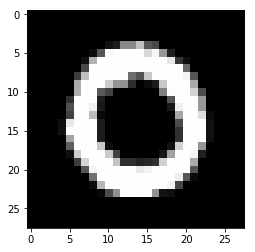

In [6]:
im1 = im1.reshape((28,28))
plt.imshow(im1, cmap = 'gray')

Printing Label for correspoing image from Labels_train dataset = labels_train[1]


In [7]:
print(labels_train[1])

[0]


Before continuing further we would be diving our dataset into 3 groups 

1- Training data- model will train itself on this data.

2- Validation Data- model will only checks its validity on this data, 
   no direct training is done on this dataset.
   
3- Test dataset- this is being provided for aking predictions on. this dataset doesnt have labels ,      it only have pixel values which our model will provide labels for once trained. 

ratio between Train / validation dataset will be 70/30

In [8]:
from sklearn.model_selection import train_test_split

pix_train, pix_valid, label_train, label_valid = train_test_split(pixels_train, labels_train, test_size = 0.30)


In [9]:
# data types of all variables
print(' Data type for pix_train = ',type(pix_train))
print(' Data type for label_train = ',type(label_train))
print(' Data type for pix_valid = ',type(pix_valid))
print(' Data type for label_valid = ',type(label_valid))

 Data type for pix_train =  <class 'pandas.core.frame.DataFrame'>
 Data type for label_train =  <class 'numpy.ndarray'>
 Data type for pix_valid =  <class 'pandas.core.frame.DataFrame'>
 Data type for label_valid =  <class 'numpy.ndarray'>


Variable names can be confusing at times but upon reading and writing the code 2-3 times it becomes more clear:

pix_train ::: pixels for training set

labels_train ::: Labels for training set 

pix_valid ::: pixels for validation set

label_valid ::: labels for validation set

Also pixels_data is in still DATAFRAME format, we will conver this into 'float32' for mathematical operations.

In [10]:
pix_train = (pix_train.values).astype('float32')
pix_test = (test_x_orig.values).astype('float32')
pix_valid = (pix_valid.values).astype('float32')


print(' Data type for pix_train = ',type(pix_train))
print(' Data type for pix_valid = ',type(pix_valid))

 Data type for pix_train =  <class 'numpy.ndarray'>
 Data type for pix_valid =  <class 'numpy.ndarray'>


Now we have 3 set of pixel data stored in pix_train, pix_valid, and pix_test.

as the color encoding of images are in 8 bit they have maximum values of 255 to represent White color. We will be scaling this data by diving all the pixel values by 255.0.

This step will ensure none of the pixel value is greater than 1.0 and less then 0.0.

In [11]:
pix_train /= 255.0
pix_test  /= 255.0
pix_valid /= 255.0

print('Maximum value in pix_train =', np.max(pix_test))
print('Minimum value in pix_train =', np.min(pix_train))

Maximum value in pix_train = 1.0
Minimum value in pix_train = 0.0


Data Reshaping: in order to fit our data into the conv model we must reshape our data as:

(number of images, 28,28,1)

currently our data is shaped as (number of images,784)

In [12]:
print('Shape of pix_train =',pix_train.shape)

Shape of pix_train = (29400, 784)


In [13]:
# reshaping
pix_train = pix_train.reshape(pix_train.shape[0], 28,28,1)
pix_test = pix_test.reshape(pix_test.shape[0], 28, 28,1)
pix_valid = pix_valid.reshape(pix_valid.shape[0], 28, 28,1)

print('Shape of pix_train after reshaping=',pix_train.shape)

Shape of pix_train after reshaping= (29400, 28, 28, 1)


Preprocessing LABELS

till now we were busy to make our pixel data ready for our model.

Now we need to process our labels, here we will use ONE HOT ENCODING.

the best article for understanding ONE HOT ENCODING - [https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/](httpS://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)

Our Digits/ labels ranges from 0-9 i.e 10 classes, it is required to input this number in our model last layer.

In [14]:
num_classes = len(np.unique(labels_train))

print('Number of classes', num_classes)

Number of classes 10


One Hot Encoding will categorise our labels into 0-1 instead of 0-9, to represent number between 0-9 using numbers 0-9 is easy. 

Example: 9 is a 9 and we understand it as 9.
but our model require more simple version of this and the only vocabulary it has of digits are 0,1.

we have to represent number 9 in form of 0 and 1.

this is done via hot hot encoding which do the following conversion to entire labele_data.

0 = [1, 0, 0, 0, 0, 0, 0 , 0, 0, 0]

1 = [0, 1, 0, 0, 0, 0, 0 , 0, 0, 0]

2 = [1, 0, 1, 0, 0, 0, 0 , 0, 0, 0]

3 = [1, 0, 0, 1, 0, 0, 0 , 0, 0, 0]

4 = [1, 0, 0, 0, 1, 0, 0 , 0, 0, 0]

5 = [1, 0, 0, 0, 0, 1, 0 , 0, 0, 0]

6 = [1, 0, 0, 0, 0, 0, 1 , 0, 0, 0]

7 = [1, 0, 0, 0, 0, 0, 0 , 1, 0, 0]

8 = [1, 0, 0, 0, 0, 0, 0 , 0, 1, 0]

9 = [1, 0, 0, 0, 0, 0, 0 , 0, 0, 1]

In [15]:
# using ONE HOT ENCODER
from keras.utils import to_categorical

label_train = to_categorical(label_train)
label_valid = to_categorical(label_valid)

print('after one hot encoder',label_valid[0])

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

after one hot encoder [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

we can manually count the number and say the number represented by this vector is 6.

# MODELLING

Keras Convolution Model

Since this is the core of this code I assume that you know the basics.

Some of the important terms are: PADDING, KERNEL_SIZE, STRIDE, number of neurons in any dimension

[assuming dimension in both Height, width are equal]

formula to calculate number of pixels after 1 conv layer is applied.

number of pixel in next layer = [(number of pixel in last layer + 2 x padding - kernel_size) / stride] + 1


for our model we will follow the below mentioned model structure::

1st conv layer : number of filter 64, kernel_size = (3,3), strides = 1, padding = 0

2nd conv layer : number of filter 64, kernel_size = (3,3), strides = 1, padding = 0

1st max Pooling layer : kernel_size = (2,2)

3rd conv layer : number of filter 128, kernel_size = (3,3), strides = 1, padding = 0

4th conv layer : number of filter 128, kernel_size = (3,3), strides = 1, padding = 0

2nd max Pooling layer : kernel_size = (2,2)

####################################################################

using formula to get output dim for 1st conv layer:

padding = 0 = padding = 'valid'

1st Conv layer output = [(28 + 0 - 3) / 1] + 1  =  26

1st Conv layer output = 26 x 26 x 64

2nd Conv layer output = [(26 + 0 - 3)  /  1] + 1 = 24

2nd Conv layer output = 24 x 24 x 64

1st Max Pool layer output = 24 x 24 x 64 -->> 12 x 12 x 64

3rd Conv layer output = [(12 + 0 -3)  / 1] + 1  = 10

3rd Conv layer output = 10 x 10 x 128

4th Conv layer output = [(10 + 0 -3)  / 1] + 1 = 8

4th Conv layer output = 8 x 8 x 128

2nd Max Pool layer output = 8 x 8 x 64 -->> 4 x 4 x 128



Now as our Image has reduced to 4 x 4 x 128 we will now be getting back to traditional Neural network,
by using 4 x 4 x 64 neurons all in one layer, instead of 4 x 4 in 128.

Total number of neurons in layer = 4 x 4 x 128 = 2048

we will be having 2 layers of 256 nuerons and last output layer of 10 neurons for 10 classes that we have.

2048 --> 512 --> 256 --> 10


Activations Functions used - ReLu for all layers except last,
It will have Softmax.

In [16]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu', input_shape = pix_train.shape[1:] ))
model.add(Conv2D(filters = 64, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), strides = 1, padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

Since the model is now compiled we can match our calculated dimensions with the models structure.
Use model.summary() to get  the results.

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

This is the last step for Modelling, here we will fit the model with the data we have pre-processed and pass on the number of epochs, batch_size and validation data.

In [18]:
hist = model.fit(pix_train, label_train, epochs = 100, batch_size = 64, validation_data = (pix_valid, label_valid))

Train on 29400 samples, validate on 12600 samples
Epoch 1/100
29400/29400 [==============================] - 8s 273us/step - loss: 0.4134 - acc: 0.8742 - val_loss: 0.1438 - val_acc: 0.9582
Epoch 2/100
29400/29400 [==============================] - 5s 164us/step - loss: 0.1418 - acc: 0.9592 - val_loss: 0.0829 - val_acc: 0.9760
Epoch 3/100
29400/29400 [==============================] - 5s 164us/step - loss: 0.1056 - acc: 0.9690 - val_loss: 0.0746 - val_acc: 0.9775
Epoch 4/100
29400/29400 [==============================] - 5s 164us/step - loss: 0.0802 - acc: 0.9756 - val_loss: 0.0658 - val_acc: 0.9792
Epoch 5/100
29400/29400 [==============================] - 5s 163us/step - loss: 0.0720 - acc: 0.9787 - val_loss: 0.0507 - val_acc: 0.9840
Epoch 6/100
29400/29400 [==============================] - 5s 164us/step - loss: 0.0627 - acc: 0.9820 - val_loss: 0.0482 - val_acc: 0.9856
Epoch 7/100
29400/29400 [==============================] - 5s 164us/step - loss: 0.0548 - acc: 0.9835 - val_loss: 0.

Number of epochs can be changed to understand the learning curve of the model.
Parameters that can regulated by users are:

[PADDING, KERNEL_SIZE, STRIDE, POOLING](https://keras.io/layers/convolutional/), [NUMBER OF NEURON IN DENSE LAYER(256 --> 1024, ANYTHING)](https://keras.io/layers/core/#dense), [ACTIVATION FUNCTIONS](https://keras.io/activations/), [OPTIMIZERS](https://keras.io/optimizers/),[ LOSS FUNCTIONS](https://keras.io/losses/), [EPOCHS, BATCH-SIZE.](https://keras.io/getting-started/faq/#what-does-sample-batch-epoch-mean)


plotting the Loss and Accuracy curve with number of epochs on y axis.

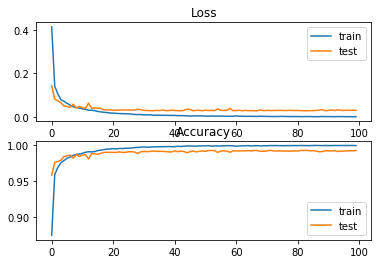

In [19]:
# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='test')
plt.legend()
plt.show()

# DATA POST PROCESSING

As our model is now trained we will use it for predicting labels for TEST set provided and then converting that output to the format required by KAGGLE to submit.

In [20]:
results = model.predict(pix_test)

results = np.argmax(results, axis = 1)

results = pd.Series(results, name = 'Label')

sub = pd.concat([pd.Series(range(1,28001), name = 'ImageId'), results], axis = 1)

sub.to_csv('csv_to_submit.csv', index = False)


Our result file will be saved names as fin_01.csv.

There are Lot more options avalable to tweak with CONV neural Network,
like [xavier initialization](https://keras.io/initializers/), [Dropout](https://keras.io/layers/core/#dropout), [BatchNormalization](https://keras.io/backend/#batch_normalization), [ImagedataGenerator](https://keras.io/preprocessing/image/) 